In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('file.csv', encoding='windows-1251')

In [3]:
df

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48124,5142333,660820070702005033693,6608,2007/07/02,0.575660,45518841,4551884,22115,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22115,FIDEOS 0 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48125,5142335,660820070618006015969,6608,2007/06/18,0.829954,110824211,11082421,22124,101070640100,1010706401,...,10107064,10107,101,1,0.71,1.0,22124,PLUMAS 3 500 G Brand_4,PASTA ALIMENTICIA SE,pasta
48126,5150526,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21818,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21818,MACARRONES 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
48127,5150527,670120071110001433949,6701,2007/11/10,0.384120,1408670389,999860498,21814,101070640100,1010706401,...,10107064,10107,101,1,0.48,1.0,21814,SPAGHETTI 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta


In [4]:
user_df = df[['tc', 'art_sp']]

In [5]:
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [6]:
user_df = user_df.rename(columns={'tc': 'user_id', 'art_sp': 'brand_info'})  # renaming

In [7]:
user_df.head()

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [8]:
def split_brand(brand_name_data):
    return brand_name_data.split(' ')[-1]

In [9]:
brnad_name = 'MARAVILLA 500 G Store_Brand'

In [10]:
brnad_name.split(' ')[-1]   # line division and output of the last element

'Store_Brand'

In [11]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)  # create a new column

In [12]:
#user_df['brand_name'] = user_df.brand_info.apply(lambda x : x.split(' ')[-1])
#a more compact way of dividing the line and outputting the last element through the lambda function

In [33]:
users_purchases.purchases.median() #find the average value of purchases

13.0

In [14]:
# information about users who have made 10 or more purchases
users_purchases = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': 'count'}) \
    .rename(columns={'brand_name': 'purchases'}) \
    .query('purchases >= 10')

In [15]:
users_purchases.head()

,user_id,purchases
14,40911,27
26,69371,14
37,82901,12
39,86281,14
41,86731,10


In [16]:
#the number of unique brands for each user
users_unique_brands = user_df.groupby('user_id', as_index=False) \
    .agg({'brand_name': pd.Series.nunique}) \
    .rename(columns={'brand_name': 'unique_brands'})  # number of unique brands 
#pd.Series analytical list from pandas 

In [17]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [18]:
# favorite brand and number of purchases of that brand for each user
lovely_brand_purchases_df = user_df.groupby(['user_id', 'brand_name'], as_index=False) \
    .agg({'brand_info': 'count'}) \
    .sort_values(['user_id', 'brand_info'], ascending=[False, False]) \
    .groupby('user_id') \
    .head(1) \
    .rename(columns={'brand_name': 'lovely_brand','brand_info': 'lovely_brand_purchases'})

In [19]:
lovely_brand_purchases_df.head()

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2


In [20]:
# merging tables
loyalty_df = users_purchases \
    .merge(users_unique_brands, on='user_id') \
    .merge(lovely_brand_purchases_df, on='user_id')

In [21]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,40911,27,5,Brand_4,19
1,69371,14,2,Brand_4,12
2,82901,12,2,Brand_4,9
3,86281,14,1,Brand_4,14
4,86731,10,3,Brand_4,5


In [22]:
loyal_users = loyalty_df[loyalty_df.unique_brands == 1]

In [23]:
loyal_users.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
3,86281,14,1,Brand_4,14
17,157311,12,1,Brand_4,12
18,162221,22,1,Brand_4,22
24,235341,19,1,Brand_4,19
29,292251,13,1,Brand_4,13


In [24]:
loyalty_df['loyalty_score'] = loyalty_df.lovely_brand_purchases / loyalty_df.purchases

In [25]:
loyalty_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyalty_score
0,40911,27,5,Brand_4,19,0.703704
1,69371,14,2,Brand_4,12,0.857143
2,82901,12,2,Brand_4,9,0.750000
3,86281,14,1,Brand_4,14,1.000000
4,86731,10,3,Brand_4,5,0.500000


C:\Users\Yarmish PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


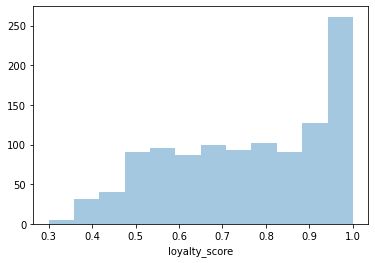

In [26]:
ax = sns.distplot(loyalty_df.loyalty_score, kde=False)

In [27]:
# favorite brands, their median level of loyalty and the number of users who belong to each brand.
brands_loyalty = loyalty_df.groupby('lovely_brand', as_index=False) \
    .agg({'loyalty_score': 'median', 'user_id': 'count'}) 

In [28]:
brands_loyalty

,lovely_brand,loyalty_score,user_id
0,Brand_1,0.717143,126
1,Brand_2,0.600000,21
2,Brand_3,0.500000,35
3,Brand_4,0.818182,700
4,Brand_7,0.466667,1
5,Store_Brand,0.733333,240


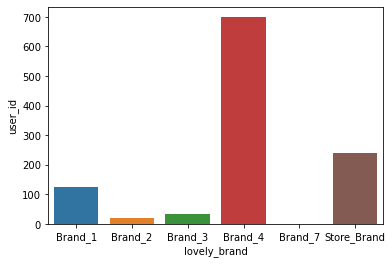

In [29]:
ax = sns.barplot(x="lovely_brand", y="user_id", data=brands_loyalty)

In [30]:
names = 'Name1 Surname1, Name2 Surname2'

In [31]:
names_list = names.split(', ')

In [32]:
names_list

['Name1 Surname1', 'Name2 Surname2']